<a href="https://colab.research.google.com/github/katerinevach/data-visualization-with-python/blob/main/visualizacion_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

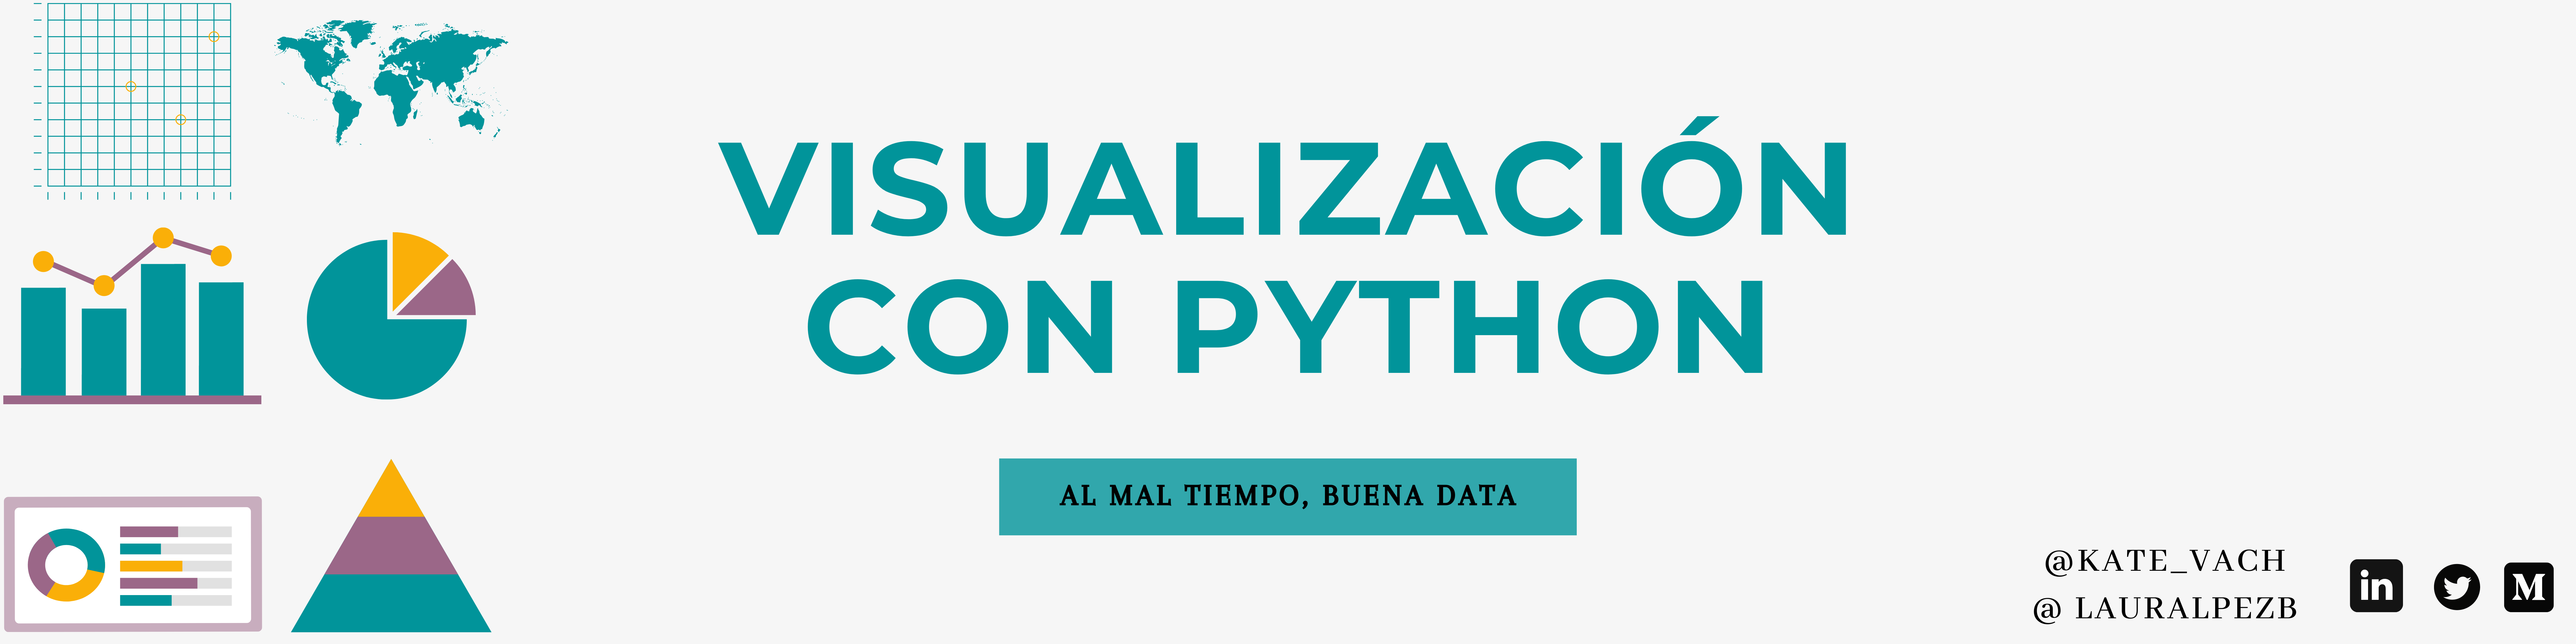

In [ ]:
from IPython.display import Image
Image(filename='Banners.png')

En este notebook veremos cómo graficar utilizando Python con sus librerías matplotlib, seaborn y plotly. Así que, ¡Manos a la obra!

En esta ocasión usaremos el dataset de Google Play Store que contiene información de las aplicaciones decargadas.

Columnas:
- Nombre de la aplicación
- Categoria
- Calificación de la aplicación
- Reseñas
- Tamaño
- Instalaciones
- Es paga o gratis
- Costo
- Grupo de edad a quién va dirigido
- Genero
- Última actualización
- Versión actual
- Versión Android

Fuente de datos: https://www.kaggle.com/lava18/google-play-store-apps



In [ ]:
#Librerias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#Leer los datos
datos = pd.read_csv('googleplaystore.csv')
datos.head()

App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]

✅ Limpieza de datos

In [ ]:

#Reemplazar valor para convertir columna Reviews en numérica
datos['Reviews'].replace({'3.0M':'3000000.0'}, inplace=True)
datos['Reviews'] = datos['Reviews'].astype(float)

#Crear columna de año
datos['year'] = datos['Last Updated'].apply(lambda x: x[-4:])

#Eliminar valores atípicos
datos = datos[~((datos['Type'].isnull()) | (datos['Type']=='0'))]

#Limpieza de la columa Installs
datos['Installs']= datos['Installs'].replace(to_replace=",", value="", regex = True)
datos['Installs'] = datos['Installs'].map(lambda x: x.rstrip('+'))
datos['Installs'] = datos['Installs'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

✅ Verificamos los tipos de datos valores y nuevas columnas

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  float64
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
 13  year            10839 non-null  object 
dtypes: float64(3), object(11)
memory usage: 1.2+ MB


✅ Verificamos la limpieza y el cambio correcto de los datos que realizamos en **Reviews**, **year**, **Type** e **Installs** con **head()**

In [ ]:
datos.head()

App  ...  year
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  2018
1                                Coloring book moana  ...  2018
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  2018
3                              Sketch - Draw & Paint  ...  2018
4              Pixel Draw - Number Art Coloring Book  ...  2018

[5 rows x 14 columns]

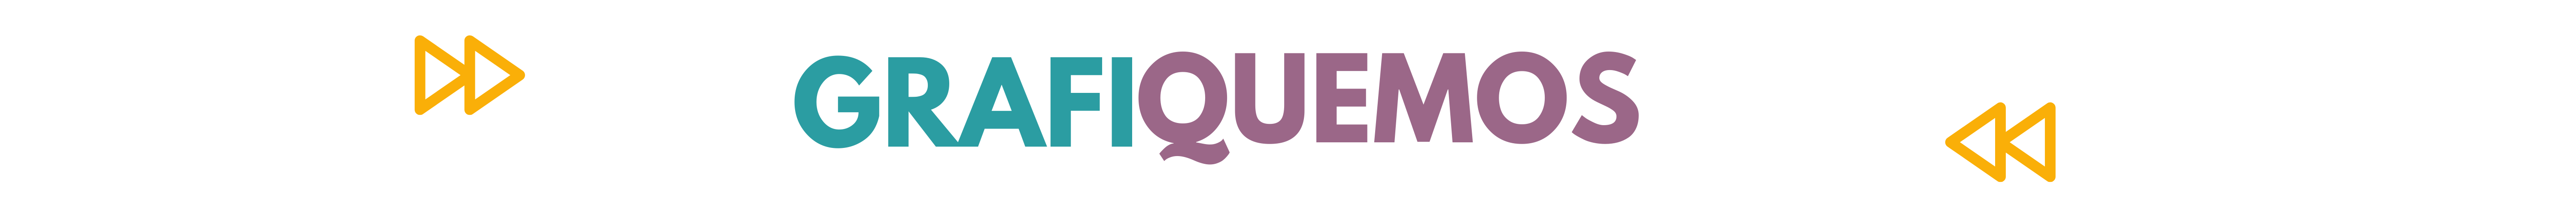

In [ ]:
from IPython.display import Image
Image(filename='grafi6_5.png')

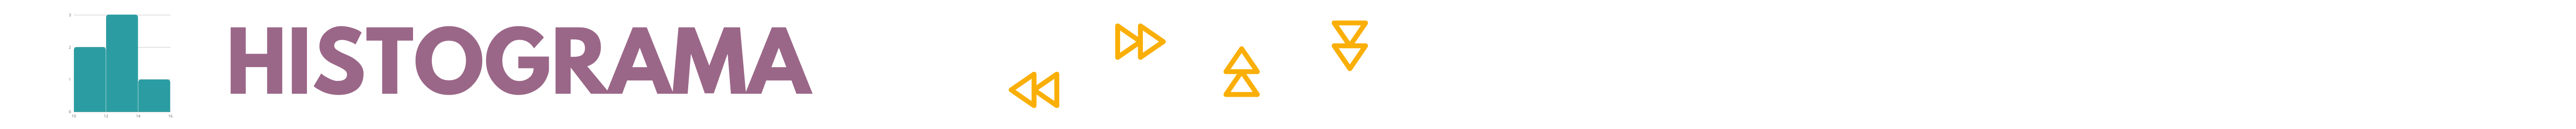

In [ ]:
from IPython.display import Image
Image(filename='1.png')

### ¿Cuál ha sido el comportamiento de las calificaciones que han recibido las aplicaciones?

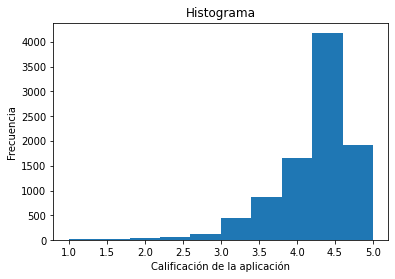

In [ ]:
# Matplotlib
plt.hist(datos['Rating'])
plt.xlabel("Calificación de la aplicación")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

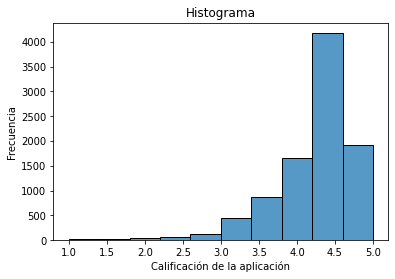

In [ ]:
# Seaborn
sns.histplot(data=datos, x="Rating", bins=10)
plt.xlabel("Calificación de la aplicación")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

In [ ]:
# Plotly
fig = px.histogram(datos, x="Rating", title='Histograma', labels={
                     "count": "Frecuencia",
                     "Rating": "Califación de la aplicación"
                 })
fig.show()

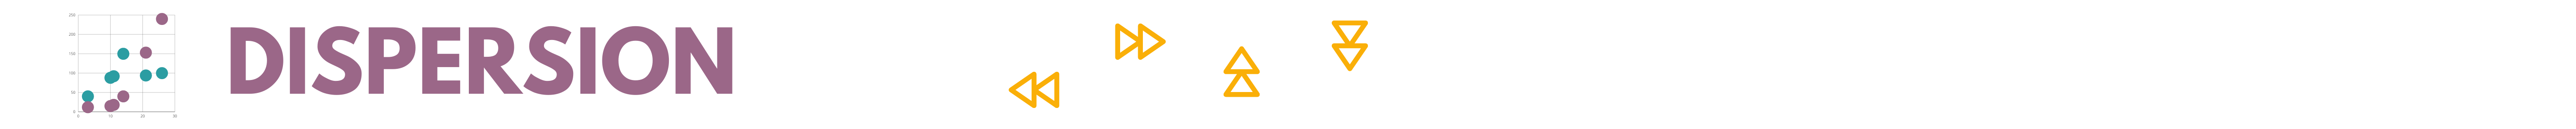

In [ ]:
from IPython.display import Image
Image(filename='2.png')

### ¿Existe relación entre el numero de reseñas que recibe una aplicación y la calificación que le dan los usuarios?



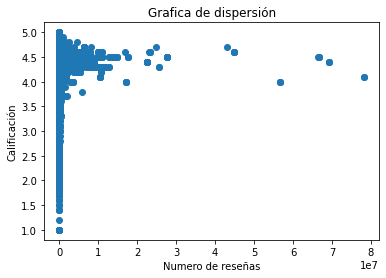

In [ ]:
# Matplotlib
plt.scatter(datos['Reviews'], datos['Rating'])
plt.xlabel("Numero de reseñas")
plt.ylabel("Calificación")
plt.title("Grafica de dispersión")
plt.show()

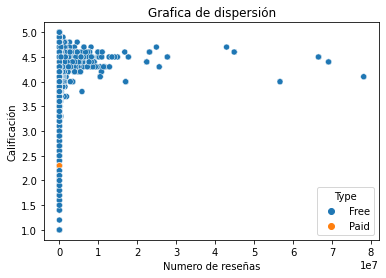

In [ ]:
# Seaborn
sns.scatterplot(data=datos, x="Reviews", y="Rating", hue="Type")
plt.xlabel("Numero de reseñas")
plt.ylabel("Calificación")
plt.title("Grafica de dispersión")
plt.show()

In [ ]:
# Plotly
fig = px.scatter(datos, x='Reviews', y='Rating', color='Type', labels={'Rating':'Calificación', 'Reviews':'Numero de reseñas'}, title='Grafica de dispersión' )
fig.show()

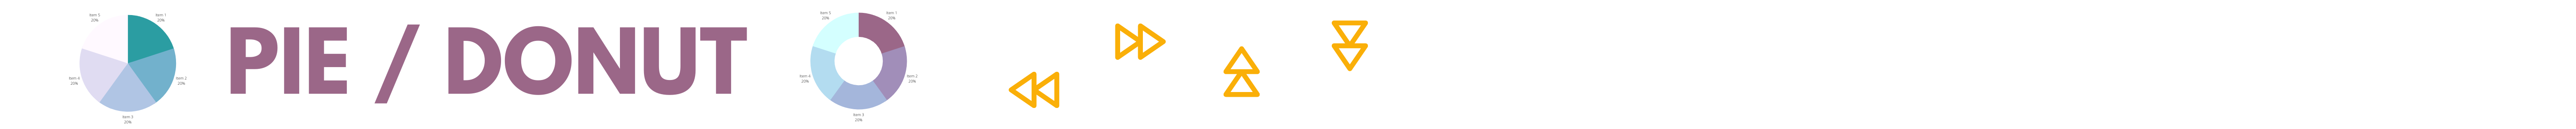

In [ ]:
from IPython.display import Image
Image(filename='3.png')

## ¿Cuál es la porción del contenido que se califica por rango de edad a quien va dirigido?



In [ ]:
#Agrupar datos
data_agrupada = datos.groupby('Content Rating')['Rating'].count().reset_index()

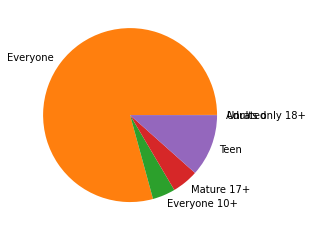

In [ ]:
# Matplotlib
plt.pie(data_agrupada['Rating'], labels=data_agrupada['Content Rating'])
plt.show()

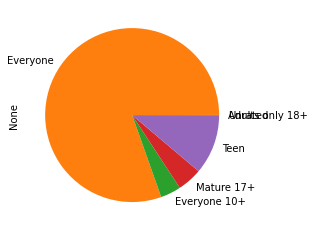

In [ ]:
# Matplotlib
datos.groupby('Content Rating').size().plot(kind='pie')
plt.show()

In [ ]:
# Plotly
fig = px.pie(datos, values='Rating', names='Content Rating', title='Tipo de Contenido', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [ ]:
# Plotly
fig = go.Figure(data=[go.Pie(labels=data_agrupada['Content Rating'], values=data_agrupada['Rating'], hole=.3)])
fig.show()

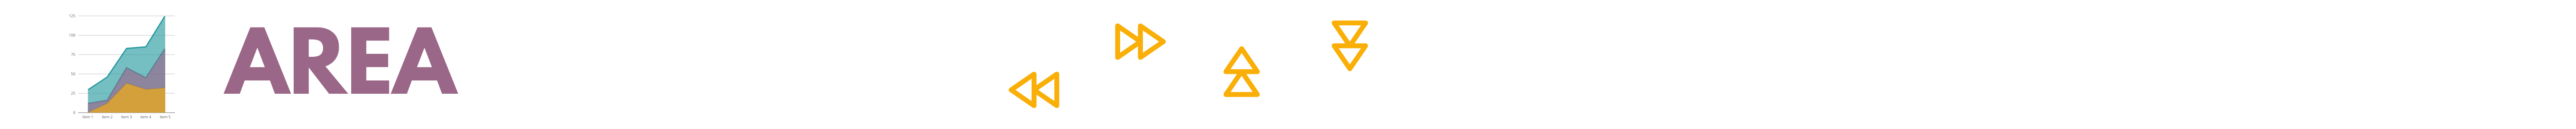

In [ ]:
from IPython.display import Image
Image(filename='4.png')

### ¿Cómo ha sido el comportamiento del promedio de reseñas por año?


In [ ]:
agrupar_año = datos.groupby('year')['Reviews'].mean().reset_index()

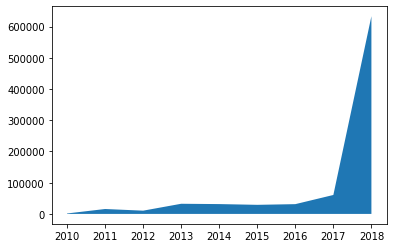

In [ ]:
# Matplotlib
plt.fill_between(agrupar_año['year'], agrupar_año['Reviews'])
plt.show()

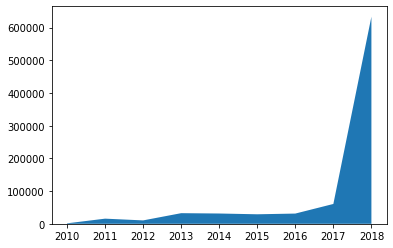

In [ ]:
# Seaborn
plt.stackplot(agrupar_año['year'], agrupar_año['Reviews']);

In [ ]:
# Plotly
fig = px.area(agrupar_año, x="year", y="Reviews")
fig.show()

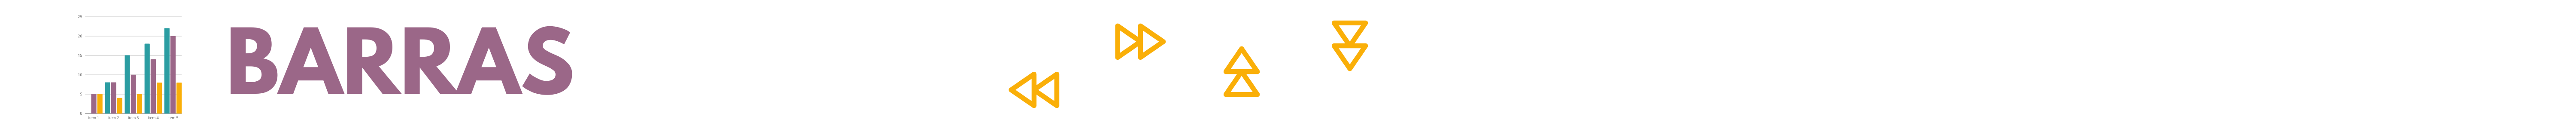

In [ ]:
from IPython.display import Image
Image(filename='5.png')

Conozcamos que tipo de aplicaciones les interesa más a los usuarios, ¿gratuitos o pagos?, aunque creo ya puede que intuyas la respuesta 🤭



In [ ]:
#Definiendo valores del eje x y del eje y
x_values = datos['Type'].unique()
y_values = datos['Type'].value_counts().tolist()

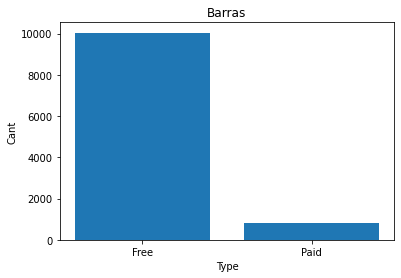

In [ ]:
# Matplotlib
plt.bar(x_values, y_values)
plt.xlabel("Type")
plt.ylabel("Cant")
plt.title("Barras")
plt.show()

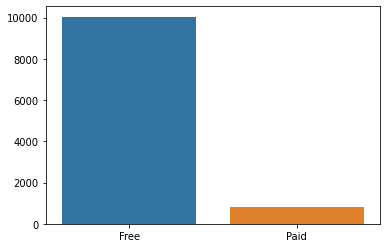

In [ ]:
# Seaborn
sns.barplot(x=x_values, y=y_values, data=datos)

In [ ]:
# Plotly
fig = px.bar(x=x_values, y=y_values, color=x_values)
fig.show()

# Barras apiladas

Vemos la cantidad de Rating y Reviews por cada año

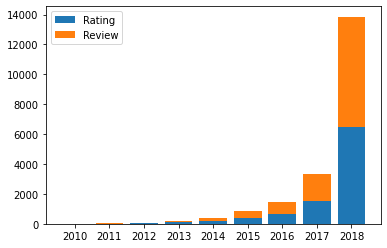

In [ ]:
# Matplotlib

anios_rating= datos.groupby('year')['Rating'].count().reset_index()
anios_review = datos.groupby('year')['Reviews'].count().reset_index()

plt.bar(anios_rating['year'], anios_rating['Rating'], label="Rating")
plt.bar(anios_review['year'], anios_review['Reviews'], bottom=anios_rating['Rating'], label="Review")
plt.legend(loc="upper left")
plt.show()

El conteo por año de cada tipo de juego

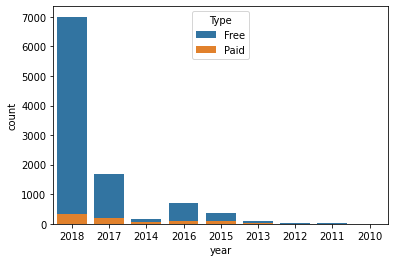

In [ ]:
# Seaborn

sns.countplot(x='year', hue="Type", data=datos, dodge=False);

La cantidad de Rating en cada año por cada tipo de juego (free or paid)

In [ ]:
# Hacemos algunas agrupaciones para obtener la grafica
tipo_rating = datos.groupby(['Type', 'year']).count().reset_index().sort_values(by='year', ascending=True)

In [ ]:
# Plotly

fig = px.bar(tipo_rating, x='year', y='Rating', color='Type',
             title = "Rating por cada tipo de juego",
             color_discrete_sequence=px.colors.qualitative.D3).update_xaxes(categoryorder='total descending') 

fig.show()

# Algunos ejemplos adicionales

## Barras Agrupadas

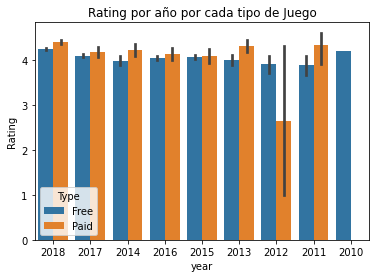

In [ ]:
#  Seaborn

sns.barplot(x="year",  y="Rating", hue="Type", data=datos).set(
    title="Rating por año por cada tipo de Juego") ;

## Barras horizontales

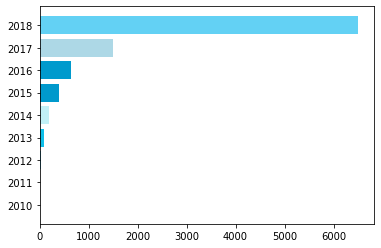

In [ ]:
# Matplotlib

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9', '#C1F0F6', '#0099CC']
plt.barh(y=anios_rating['year'], width=anios_rating['Rating'], color=color_palette_list);

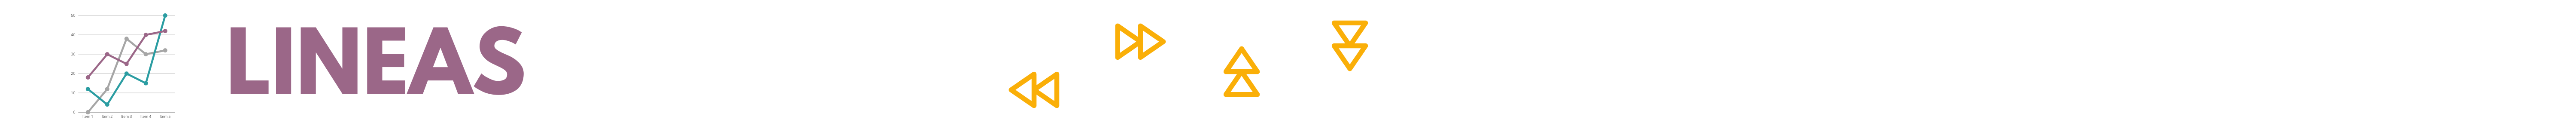

In [ ]:
from IPython.display import Image
Image(filename='6.png')

### conozcamos el Rating promedio de los juegos por año

In [ ]:
agrupando_años=datos.groupby('year', as_index=False).agg({'Installs': 'sum'}).sort_values(by='year', ascending=True)

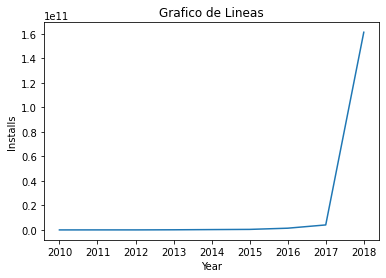

In [ ]:
# Matplotlib

plt.plot(agrupando_años.year, agrupando_años.Installs)
plt.xlabel("Year")
plt.ylabel("Installs")
plt.title("Grafico de Lineas")
plt.show()

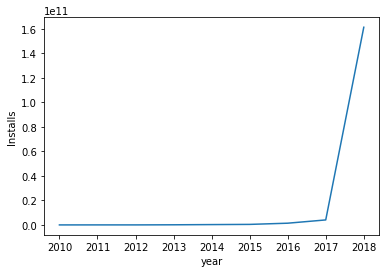

In [ ]:
# Seaborn

sns.lineplot( data= agrupando_años, x= 'year', y='Installs')

In [ ]:
# Plotly

fig = px.line(agrupando_años, x='year', y="Installs")
fig.show()

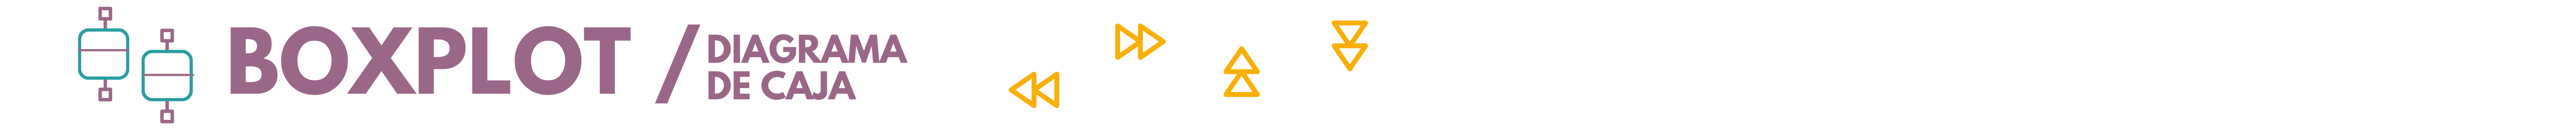

In [ ]:
from IPython.display import Image
Image(filename='7.png')

### Distribución del Rating de las aplicaciones dependiendo del valor de la aplicación (de pago o gratuita)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



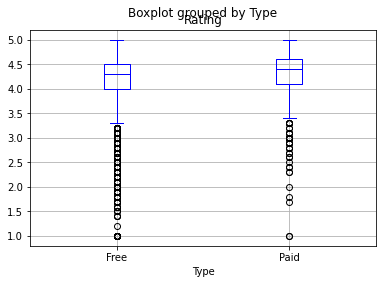

In [ ]:
# Matplotlib

datos.boxplot(column=['Rating'], by='Type', color='blue')
plt.show()

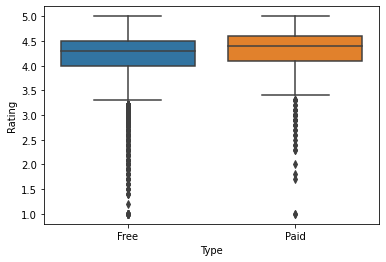

In [ ]:
# Seaborn

sns.boxplot(data=datos, x="Type", y="Rating")

In [ ]:
# Plotly

fig = px.box(datos,  x="Type", y="Rating")
fig.show()

# Algunos ejemplos adicionales

## Violinplot/Violin

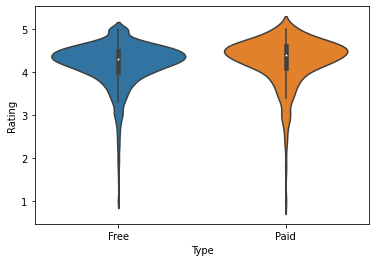

In [ ]:
# Seaborn
from seaborn import violinplot
violinplot(x="Type", y="Rating",  data=datos)

In [ ]:
# Plotly

fig = px.violin(datos, x='Type', y="Rating", color="Type", hover_data=datos.columns, box=True)
fig.show()

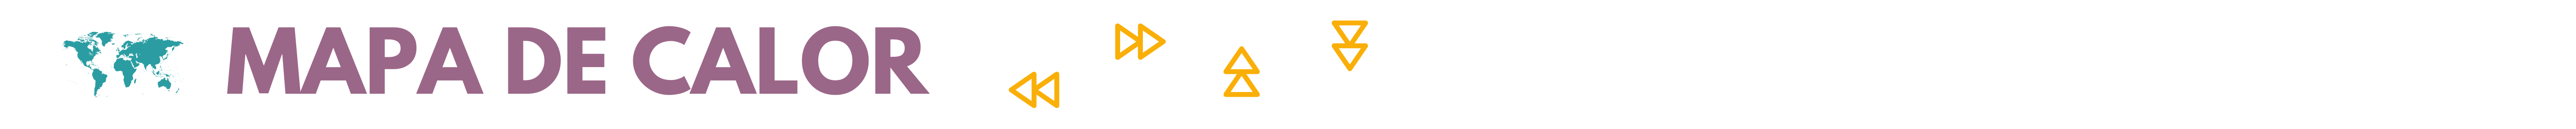

In [ ]:
from IPython.display import Image
Image(filename='8.png')

### Veamos cuál es la correlación de las variables numéricas 

In [ ]:
import numpy as np

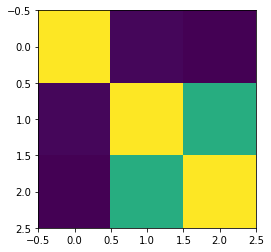

In [ ]:
# Matplotlib

plt.imshow(datos.corr())
plt.show()

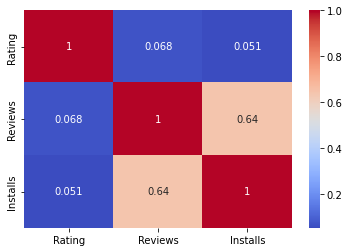

In [ ]:
# Seaborn

sns.heatmap(datos.corr(), annot=True, cmap = 'coolwarm')

In [ ]:
# Plotly

fig = px.imshow(datos.corr(), title='correlacion de datos numericos', text_auto=True)
fig.show()